In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fitter import Fitter, get_common_distributions

In [2]:
import pingouin as pg

In [3]:
train1=pd.read_csv(r'C:\Users\Nelson\Documents\Sync\Archivos de práctica Curso\DataSource\Precio casa Arg Col\train.csv')
train1.head()

,Id,pais,provincia_departamento,ciudad,property_type,operation_type,rooms,bedrooms,bathrooms,surface_total,currency,price
0,0,Argentina,Capital Federal,Villa Crespo,Departamento,Venta,2.0,1.0,1.0,37.0,USD,85000.0
1,1,Argentina,Capital Federal,Palermo,Departamento,Venta,6.0,4.0,4.0,300.0,USD,1590000.0
2,2,Colombia,Atlántico,Barranquilla,Apartamento,Venta,3.0,3.0,3.0,95.0,USD,85329.0
3,3,Colombia,Valle del Cauca,Cali,Apartamento,Venta,3.0,3.0,1.0,60.0,USD,22846.0
4,4,Argentina,Capital Federal,Balvanera,Departamento,Venta,3.0,2.0,1.0,45.0,USD,80000.0


In [3]:
print(train1.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25660 entries, 0 to 25659
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      25660 non-null  int64  
 1   pais                    25660 non-null  object 
 2   provincia_departamento  25660 non-null  object 
 3   ciudad                  25660 non-null  object 
 4   property_type           25660 non-null  object 
 5   operation_type          25660 non-null  object 
 6   rooms                   25660 non-null  float64
 7   bedrooms                25660 non-null  float64
 8   bathrooms               25660 non-null  float64
 9   surface_total           25660 non-null  float64
 10  currency                25660 non-null  object 
 11  price                   25660 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 2.3+ MB
None


<AxesSubplot:xlabel='price', ylabel='Count'>

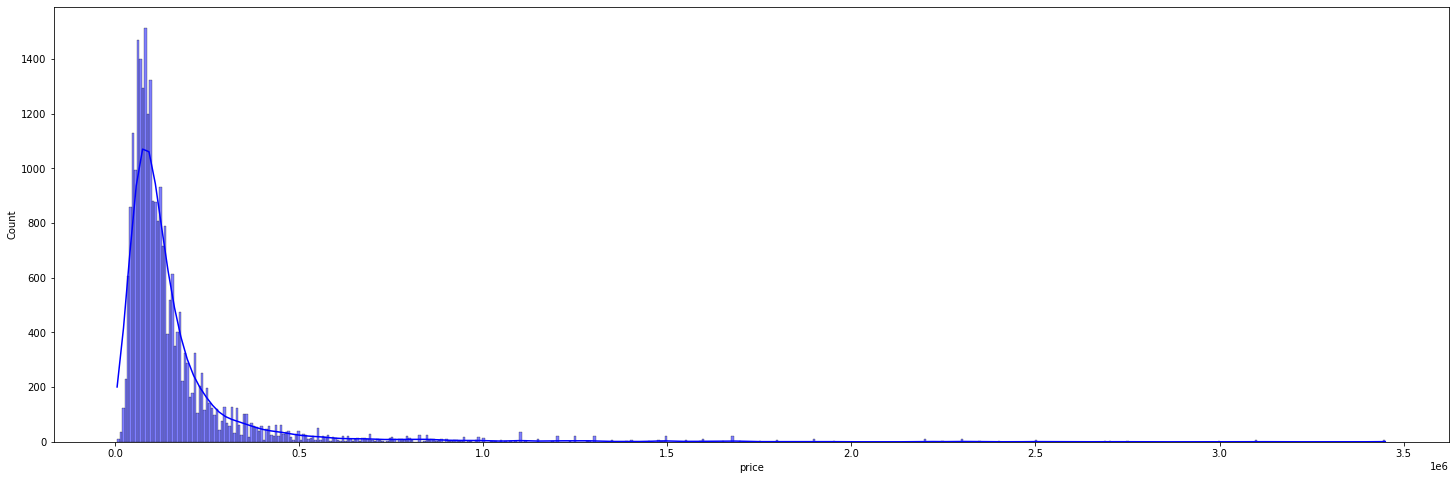

In [73]:
fig,axe=plt.subplots(figsize=(25,8))
sns.histplot(data=train1['price'],  kde=True, color='blue', ax=axe)

<AxesSubplot:xlabel='price'>

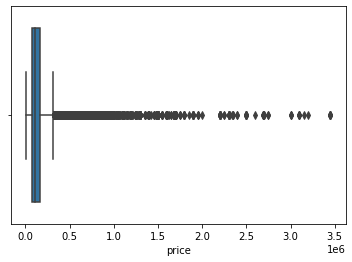

In [4]:
sns.boxplot(x=train1['price'],data=train1 )

In [10]:
#Veo outliers
q1=train1['price'].quantile(0.25)
q2=train1['price'].quantile(0.75)
Iqr=q2-q1
print(q1,q2,Iqr)
print(train1['price'].median(),train1['price'].min(), train1['price'].max())

71000.0 170000.0 99000.0
105000.0 6009.0 3450000.0


In [11]:
b1=q1-1.5*Iqr
b1#big inf =6009

-77500.0

In [12]:
b2=q2+1.5*Iqr
b2#big sup = 318500

318500.0

In [15]:
losout=((train1['price']<b1)|(train1['price']>b2))
losout

0        False
1         True
2        False
3        False
4        False
         ...  
25655    False
25656    False
25657    False
25658    False
25659    False
Name: price, Length: 25660, dtype: bool

In [16]:
outliers1=train1[losout]
outliers1

,Id,pais,provincia_departamento,ciudad,property_type,operation_type,rooms,bedrooms,bathrooms,surface_total,currency,price
1,1,Argentina,Capital Federal,Palermo,Departamento,Venta,6.0,4.0,4.0,300.0,USD,1590000.0
17,17,Argentina,Capital Federal,Belgrano,Departamento,Venta,4.0,3.0,3.0,171.0,USD,1250000.0
24,24,Argentina,Capital Federal,Recoleta,Departamento,Venta,3.0,2.0,1.0,73.0,USD,342113.0
30,30,Argentina,Capital Federal,Recoleta,Departamento,Venta,5.0,2.0,2.0,178.0,USD,540000.0
34,34,Argentina,Capital Federal,Belgrano,Departamento,Venta,5.0,4.0,3.0,210.0,USD,745000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
25595,25595,Argentina,Capital Federal,Belgrano,Departamento,Venta,3.0,2.0,2.0,80.0,USD,550000.0
25616,25616,Argentina,Capital Federal,Belgrano,Departamento,Venta,3.0,2.0,1.0,82.0,USD,550000.0
25624,25624,Argentina,Capital Federal,Puerto Madero,Departamento,Venta,4.0,3.0,4.0,180.0,USD,1390000.0
25635,25635,Argentina,Capital Federal,Palermo,Departamento,Venta,6.0,3.0,2.0,304.0,USD,1480000.0


In [17]:
sinout1=(train1['price']>=b1)&(train1['price']<=b2) 
losinout1=train1[sinout1]
losinout1

,Id,pais,provincia_departamento,ciudad,property_type,operation_type,rooms,bedrooms,bathrooms,surface_total,currency,price
0,0,Argentina,Capital Federal,Villa Crespo,Departamento,Venta,2.0,1.0,1.0,37.0,USD,85000.0
2,2,Colombia,Atlántico,Barranquilla,Apartamento,Venta,3.0,3.0,3.0,95.0,USD,85329.0
3,3,Colombia,Valle del Cauca,Cali,Apartamento,Venta,3.0,3.0,1.0,60.0,USD,22846.0
4,4,Argentina,Capital Federal,Balvanera,Departamento,Venta,3.0,2.0,1.0,45.0,USD,80000.0
5,5,Colombia,Santander,Floridablanca,Apartamento,Venta,3.0,3.0,2.0,75.0,USD,60556.0
...,...,...,...,...,...,...,...,...,...,...,...,...
25655,25655,Colombia,Antioquia,Bello,Apartamento,Venta,3.0,3.0,2.0,61.0,USD,41288.0
25656,25656,Argentina,Capital Federal,Caballito,Departamento,Venta,2.0,1.0,1.0,40.0,USD,85000.0
25657,25657,Argentina,Capital Federal,Villa del Parque,Departamento,Venta,2.0,1.0,1.0,61.0,USD,185700.0
25658,25658,Argentina,Capital Federal,San Cristobal,Departamento,Venta,3.0,2.0,1.0,53.0,USD,120000.0


C:\Users\Nelson\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='price'>

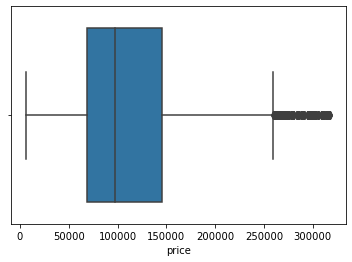

In [23]:
sns.boxplot(losinout1['price'])

In [45]:
q11=losinout1['price'].quantile(0.25)
q22=losinout1['price'].quantile(0.75)
Iqr2=q22-q11
print(q11,q22,Iqr2)

68814.0 145000.0 76186.0


In [47]:
bi2=q11-1.5*Iqr2
bi2#big inf =6009

-45465.0

In [50]:
bs2=q22+1.5*Iqr2
bs2#big sup = 318500

259279.0

In [52]:
losout2=((train1['price']<bi2)|(train1['price']>bi2))


In [54]:
sinout2=(train1['price']>=bi2)&(train1['price']<=bs2) 
losinout2=train1[sinout2]
losinout2

,Id,pais,provincia_departamento,ciudad,property_type,operation_type,rooms,bedrooms,bathrooms,surface_total,currency,price
0,0,Argentina,Capital Federal,Villa Crespo,Departamento,Venta,2.0,1.0,1.0,37.0,USD,85000.0
2,2,Colombia,Atlántico,Barranquilla,Apartamento,Venta,3.0,3.0,3.0,95.0,USD,85329.0
3,3,Colombia,Valle del Cauca,Cali,Apartamento,Venta,3.0,3.0,1.0,60.0,USD,22846.0
4,4,Argentina,Capital Federal,Balvanera,Departamento,Venta,3.0,2.0,1.0,45.0,USD,80000.0
5,5,Colombia,Santander,Floridablanca,Apartamento,Venta,3.0,3.0,2.0,75.0,USD,60556.0
...,...,...,...,...,...,...,...,...,...,...,...,...
25655,25655,Colombia,Antioquia,Bello,Apartamento,Venta,3.0,3.0,2.0,61.0,USD,41288.0
25656,25656,Argentina,Capital Federal,Caballito,Departamento,Venta,2.0,1.0,1.0,40.0,USD,85000.0
25657,25657,Argentina,Capital Federal,Villa del Parque,Departamento,Venta,2.0,1.0,1.0,61.0,USD,185700.0
25658,25658,Argentina,Capital Federal,San Cristobal,Departamento,Venta,3.0,2.0,1.0,53.0,USD,120000.0


C:\Users\Nelson\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='price'>

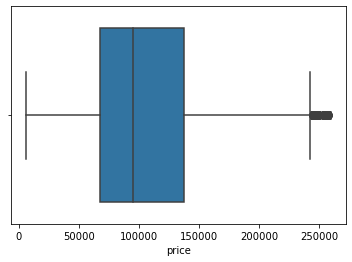

In [55]:
sns.boxplot(losinout2['price'])

<AxesSubplot:xlabel='price', ylabel='Count'>

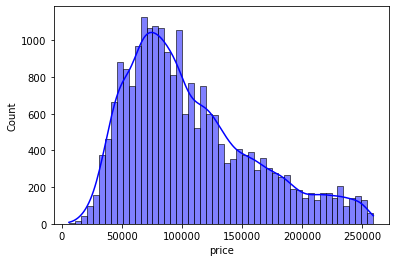

In [57]:
sns.histplot(data=losinout2['price'],  kde=True, color='blue')

In [66]:
qi3=losinout2['price'].quantile(0.25)
qs3=losinout2['price'].quantile(0.75)
Iqr3=qs3-qi3
bs4=qs3+1.5*Iqr3
sinout3=(losinout2['price']>=bi2)&(train1['price']<=bs2)
ultimo1=train1[sinout3]
ultimo1

,Id,pais,provincia_departamento,ciudad,property_type,operation_type,rooms,bedrooms,bathrooms,surface_total,currency,price
0,0,Argentina,Capital Federal,Villa Crespo,Departamento,Venta,2.0,1.0,1.0,37.0,USD,85000.0
2,2,Colombia,Atlántico,Barranquilla,Apartamento,Venta,3.0,3.0,3.0,95.0,USD,85329.0
3,3,Colombia,Valle del Cauca,Cali,Apartamento,Venta,3.0,3.0,1.0,60.0,USD,22846.0
4,4,Argentina,Capital Federal,Balvanera,Departamento,Venta,3.0,2.0,1.0,45.0,USD,80000.0
5,5,Colombia,Santander,Floridablanca,Apartamento,Venta,3.0,3.0,2.0,75.0,USD,60556.0
...,...,...,...,...,...,...,...,...,...,...,...,...
25655,25655,Colombia,Antioquia,Bello,Apartamento,Venta,3.0,3.0,2.0,61.0,USD,41288.0
25656,25656,Argentina,Capital Federal,Caballito,Departamento,Venta,2.0,1.0,1.0,40.0,USD,85000.0
25657,25657,Argentina,Capital Federal,Villa del Parque,Departamento,Venta,2.0,1.0,1.0,61.0,USD,185700.0
25658,25658,Argentina,Capital Federal,San Cristobal,Departamento,Venta,3.0,2.0,1.0,53.0,USD,120000.0


C:\Users\Nelson\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='price'>

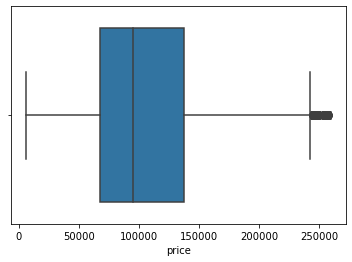

In [65]:
sns.boxplot(ultimo1['price'])

<AxesSubplot:xlabel='price', ylabel='Count'>

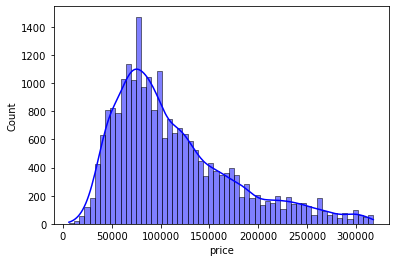

In [25]:
sns.histplot(data=losinout1['price'],  kde=True, color='blue',)

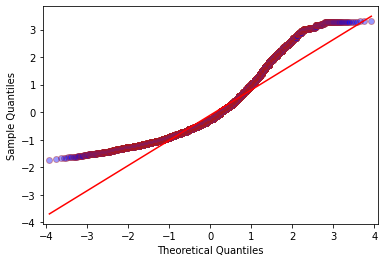

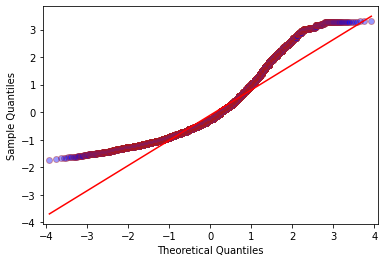

In [28]:
sm.qqplot(losinout1['price'],fit= True,line='q',color='firebrick',alpha = 0.4,lw= 2)

((array([-4.01411875, -3.79976253, -3.6825441 , ...,  3.6825441 ,
          3.79976253,  4.01411875]),
  array([  6009.,   7707.,  10800., ..., 318000., 318000., 318000.])),
 (58981.7749967845, 113497.61731158268, 0.9549034419112561))

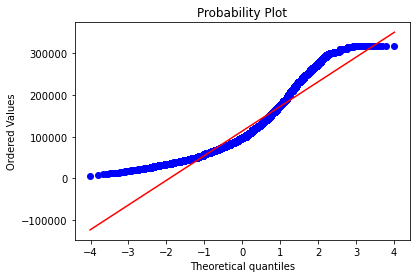

In [29]:
stats.probplot(losinout1['price'], plot=plt)

In [30]:
stats.shapiro(losinout1['price'])

C:\Users\Nelson\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9117549061775208, pvalue=0.0)

In [42]:
nordata1, ellambda1 = stats.boxcox(train1['price']) 
ellambda1

-0.3335139191261279

((array([-4.03749597, -3.82431514, -3.70778832, ...,  3.70778832,
          3.82431514,  4.03749597]),
  array([2.83371   , 2.8468257 , 2.86295553, ..., 2.97858622, 2.97858622,
         2.97858622])),
 (0.014370808732474188, 2.935281864206169, 0.9979880594151422))

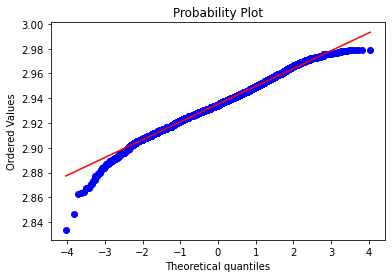

In [33]:
stats.probplot(nordata1, plot=plt)

In [34]:
stats.shapiro(nordata1)

C:\Users\Nelson\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9960185885429382, pvalue=2.329304107510685e-25)

<AxesSubplot:ylabel='Count'>

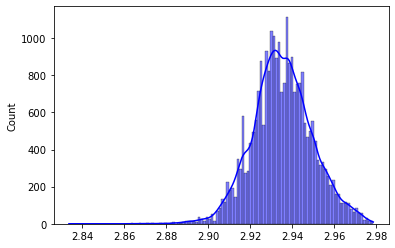

In [35]:
sns.histplot(data=nordata1,  kde=True, color='blue',)

In [36]:
stats.shapiro(np.log(train1['price']))

C:\Users\Nelson\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9589751958847046, pvalue=0.0)

C:\Users\Nelson\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

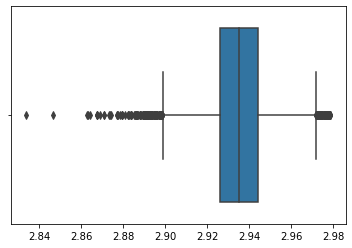

In [37]:
sns.boxplot(nordata1)

In [41]:
#Veo outliers
nordataFr1=pd.DataFrame(nordata1)
q1=nordataFr1.quantile(0.25)
q2=nordataFr1.quantile(0.75)
Iqr=q2-q1
print(q1)
print(q2)
print(Iqr)
print(nordataFr1.median(),nordataFr1.min(),nordataFr1.max())

0    2.926111
Name: 0.25, dtype: float64
0    2.944368
Name: 0.75, dtype: float64
0    0.018256
dtype: float64
0    2.934952
dtype: float64 0    2.83371
dtype: float64 0    2.978586
dtype: float64


In [74]:
train1['price'].mean()

165680.1890880748

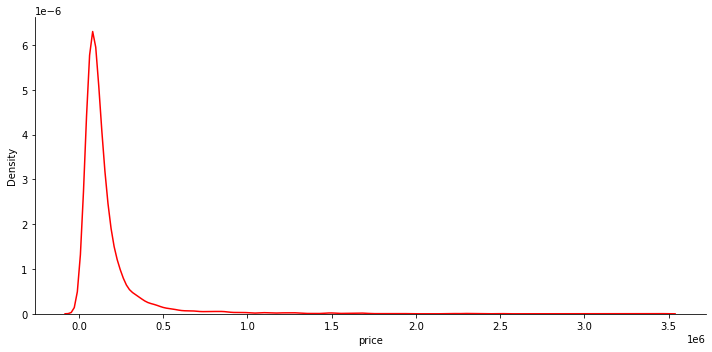

In [4]:
#Label analisis
sns.displot(data=train1['price'],  kind='kde',height=5, aspect=2, color='red', )

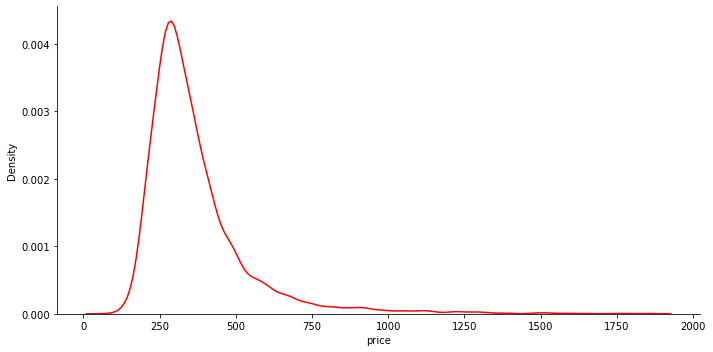

In [5]:
sns.displot(data=np.sqrt(train1['price']),  kind='kde',height=5, aspect=2, color='red', )

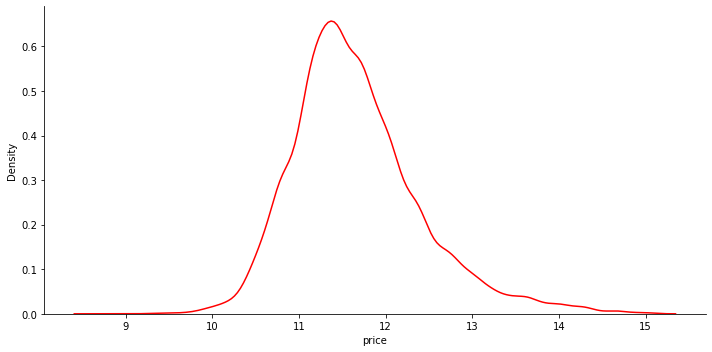

In [6]:
sns.displot(data=np.log(train1['price']),  kind='kde',height=5, aspect=2, color='red', )

,sumsquare_error,aic,bic,kl_div
cauchy,9.152929e-12,3.710571e+03,-912696.549343,inf
beta,2.140452e-11,5.493484e+03,-890877.351955,inf
logistic,3.621906e-11,6.714090e+03,-877400.921209,inf
expon,3.931918e-11,4.557101e+03,-875293.547620,inf
exponpow,5.813550e-11,5.210103e+03,-865248.689062,inf
norm,6.961147e-11,9.459003e+03,-860636.119974,inf
powerlaw,8.718429e-11,3.139716e+03,-854850.033119,inf
chi2,1.014358e-10,3.884496e+04,-850965.069267,inf
gamma,1.300211e-10,inf,-844594.433356,NaN


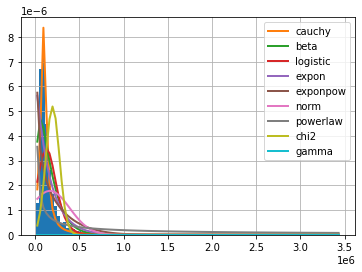

In [11]:
from fitter import Fitter, get_common_distributions
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']

fitter = Fitter(train1['price'], distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=True)

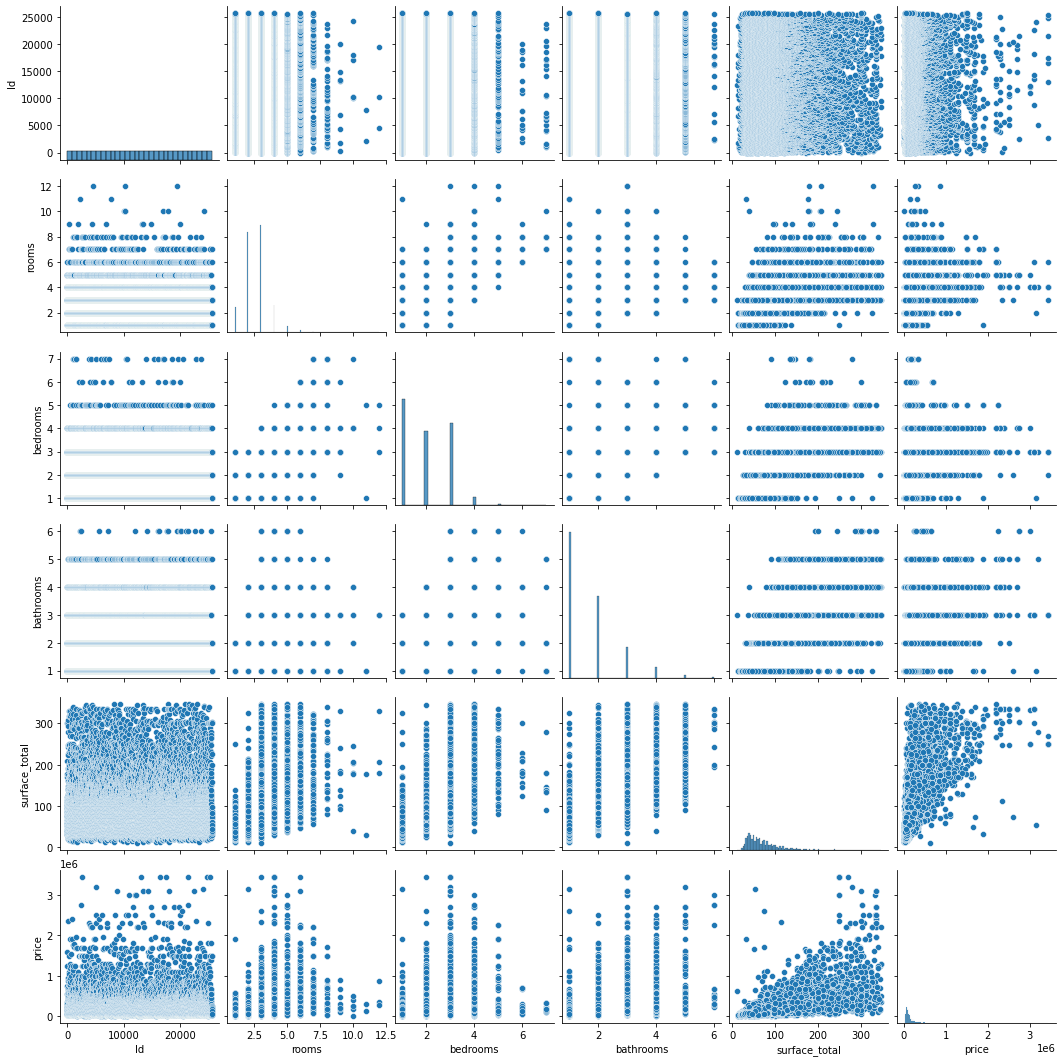

In [42]:
sns.pairplot(data=train1 )

<AxesSubplot:xlabel='rooms', ylabel='Count'>

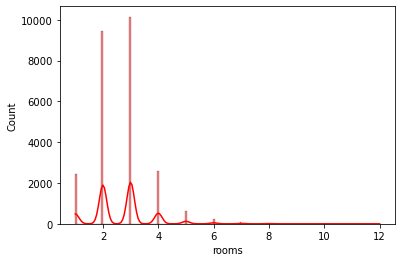

In [15]:
sns.histplot(data=train1['rooms'],  kde=True, color='red' )#colocar mas de 5 juntos

<AxesSubplot:xlabel='bedrooms', ylabel='Count'>

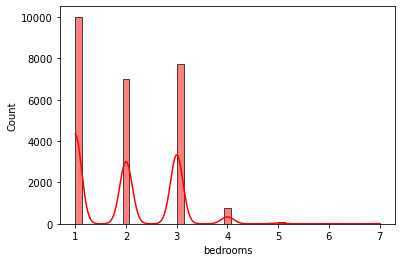

In [16]:
sns.histplot(data=train1['bedrooms'],  kde=True, color='red' )#colocar mas de 4 juntos

<AxesSubplot:xlabel='bathrooms', ylabel='Count'>

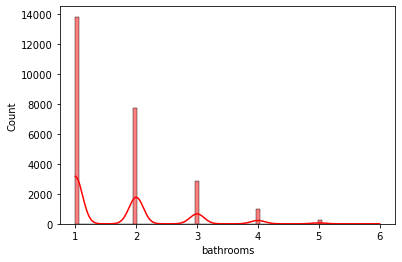

In [17]:
sns.histplot(data=train1['bathrooms'],  kde=True, color='red' )#colocar mas de 4 juntos

In [27]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats
from scipy.stats import pearsonr

<AxesSubplot:xlabel='surface_total', ylabel='Count'>

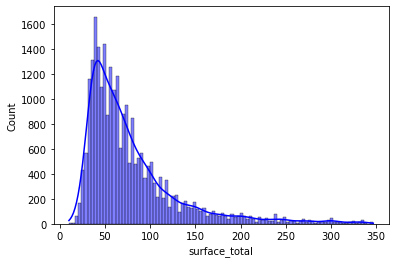

In [5]:
sns.histplot(data=train1['surface_total'],  kde=True, color='blue' )

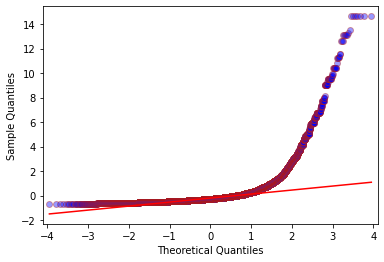

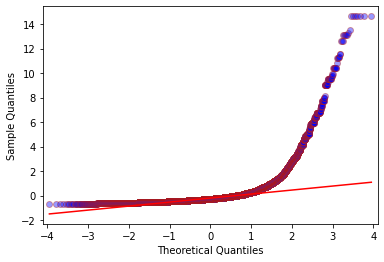

In [63]:
sm.qqplot(train1['price'],fit= True,line='q',color='firebrick',alpha = 0.4,lw= 2)

((array([-4.03749597, -3.82431514, -3.70778832, ...,  3.70778832,
          3.82431514,  4.03749597]),
  array([   6009.,    7707.,   10800., ..., 3450000., 3450000., 3450000.])),
 (153698.21465885118, 165680.18908807487, 0.6846730521854459))

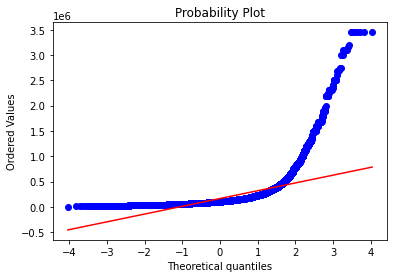

In [65]:
stats.probplot(train1['price'], plot=plt)

In [76]:
stats.shapiro(train1['price'])

C:\Users\Nelson\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.4689634442329407, pvalue=0.0)

In [80]:
from scipy.special import kolmogorov
kolmogorov(train1['price'])

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
25655    0.0
25656    0.0
25657    0.0
25658    0.0
25659    0.0
Name: price, Length: 25660, dtype: float64

In [82]:
import pingouin as pg
pg.pairwise_corr(train1, method='spearman')#p-unc es el p-value

,X,Y,method,alternative,n,r,CI95%,p-unc,power
0,Id,rooms,spearman,two-sided,25660,-0.012114,"[-0.02, 0.0]",0.052312,0.492322
1,Id,bedrooms,spearman,two-sided,25660,-0.008676,"[-0.02, 0.0]",0.164623,0.284656
2,Id,bathrooms,spearman,two-sided,25660,-0.007913,"[-0.02, 0.0]",0.204989,0.244941
3,Id,surface_total,spearman,two-sided,25660,-0.009702,"[-0.02, 0.0]",0.120160,0.342652
4,Id,price,spearman,two-sided,25660,-0.006561,"[-0.02, 0.01]",0.293276,0.182979
5,rooms,bedrooms,spearman,two-sided,25660,0.827812,"[0.82, 0.83]",0.000000,1.000000
6,rooms,bathrooms,spearman,two-sided,25660,0.489392,"[0.48, 0.5]",0.000000,1.000000
7,rooms,surface_total,spearman,two-sided,25660,0.719265,"[0.71, 0.73]",0.000000,1.000000
8,rooms,price,spearman,two-sided,25660,0.437393,"[0.43, 0.45]",0.000000,1.000000
9,bedrooms,bathrooms,spearman,two-sided,25660,0.726426,"[0.72, 0.73]",0.000000,1.000000


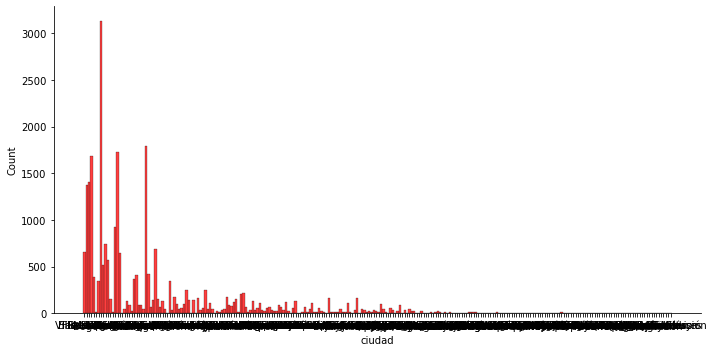

In [22]:
sns.displot(data=train1['ciudad'], height=5, aspect=2, color='red' )

In [19]:
maximoC=train1['ciudad'].max()
maximoC

'Zipaquirá'

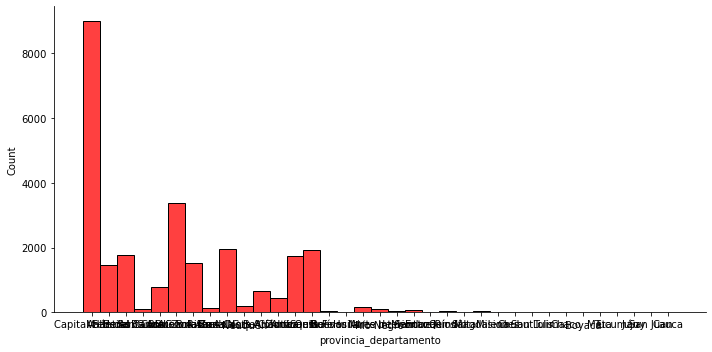

In [23]:
sns.displot(data=train1['provincia_departamento'], height=5, aspect=2, color='red' )

In [23]:
maximoP=train1['provincia_departamento'].max()
maximoP

'Valle del Cauca'

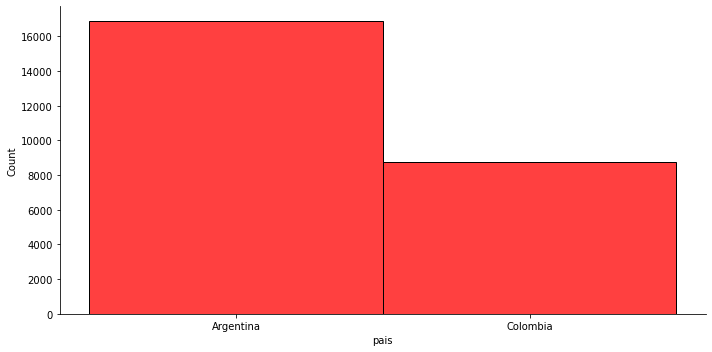

In [13]:
sns.displot(data=train1['pais'], height=5, aspect=2, color='red' )

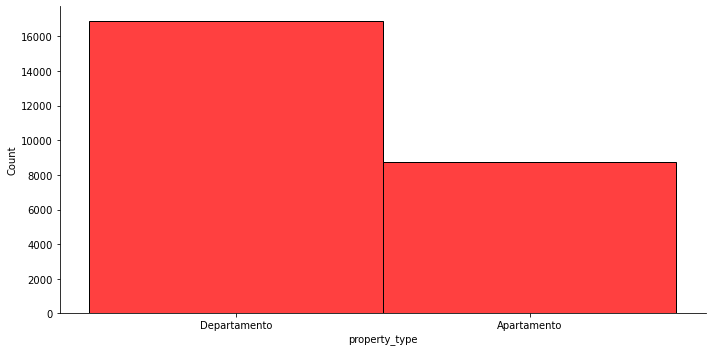

In [14]:
sns.displot(data=train1['property_type'], height=5, aspect=2, color='red' )

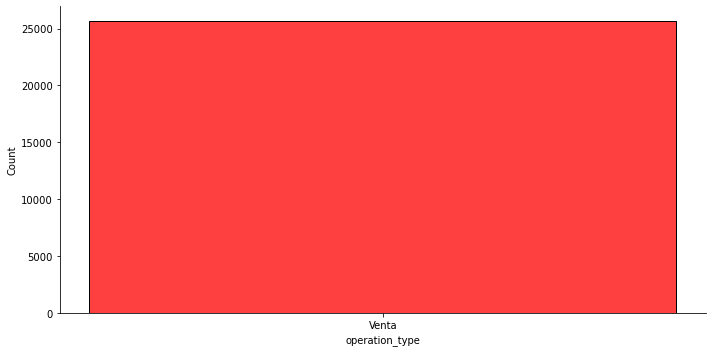

In [16]:
sns.displot(data=train1['operation_type'], height=5, aspect=2, color='red' )

<AxesSubplot:xlabel='surface_total', ylabel='price'>

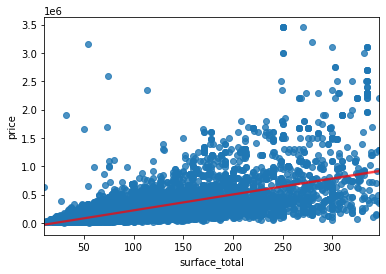

In [6]:
sns.regplot(x=train1['surface_total'], y=train1['price'],data=train1,line_kws= {"color":"r","alpha":0.7} )

<AxesSubplot:xlabel='rooms', ylabel='price'>

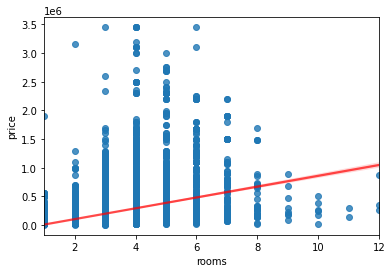

In [5]:
sns.regplot(x=train1['rooms'], y=train1['price'],data=train1,line_kws= {"color":"r","alpha":0.7} )

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

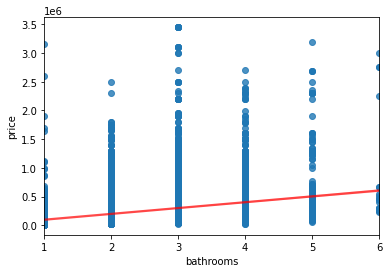

In [7]:
sns.regplot(x=train1['bathrooms'], y=train1['price'],data=train1,line_kws= {"color":"r","alpha":0.7} )

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

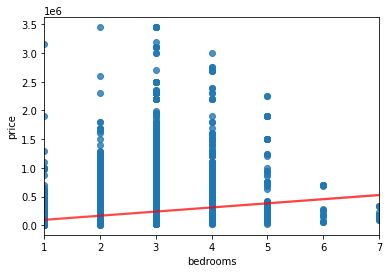

In [8]:
sns.regplot(x=train1['bedrooms'], y=train1['price'],data=train1,line_kws= {"color":"r","alpha":0.7} )

In [7]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = train1.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
1,rooms,bedrooms,0.770108,0.770108
5,bedrooms,rooms,0.770108,0.770108
17,surface_total,bathrooms,0.765760,0.765760
13,bathrooms,surface_total,0.765760,0.765760
8,bedrooms,surface_total,0.686146,0.686146
16,surface_total,bedrooms,0.686146,0.686146
7,bedrooms,bathrooms,0.678597,0.678597
11,bathrooms,bedrooms,0.678597,0.678597
19,surface_total,price,0.664942,0.664942
23,price,surface_total,0.664942,0.664942


In [81]:
train1.corr(method='spearman')

,Id,rooms,bedrooms,bathrooms,surface_total,price
Id,1.000000,-0.012114,-0.008676,-0.007913,-0.009702,-0.006561
rooms,-0.012114,1.000000,0.827812,0.489392,0.719265,0.437393
bedrooms,-0.008676,0.827812,1.000000,0.726426,0.810757,0.300005
bathrooms,-0.007913,0.489392,0.726426,1.000000,0.778773,0.374596
surface_total,-0.009702,0.719265,0.810757,0.778773,1.000000,0.609503
price,-0.006561,0.437393,0.300005,0.374596,0.609503,1.000000


<AxesSubplot:>

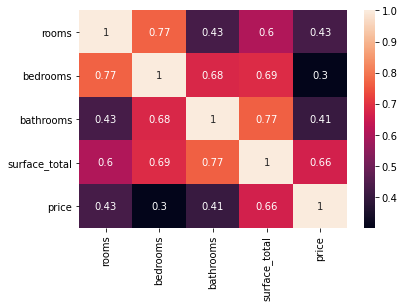

In [12]:
sns.heatmap(data=corr_matrix, annot=True)

In [13]:
train1.select_dtypes(include=['object']).describe()

,pais,provincia_departamento,ciudad,property_type,operation_type,currency
count,25660,25660,25660,25660,25660,25660
unique,2,35,248,2,1,1
top,Argentina,Capital Federal,Bogotá D.C,Departamento,Venta,USD
freq,16892,8998,3131,16892,25660,25660


<AxesSubplot:xlabel='bathrooms', ylabel='price'>

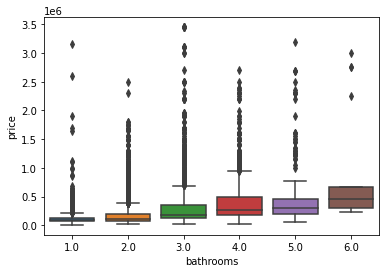

In [6]:
sns.boxplot(x=train1['bathrooms'], y=train1['price'],data=train1 )

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

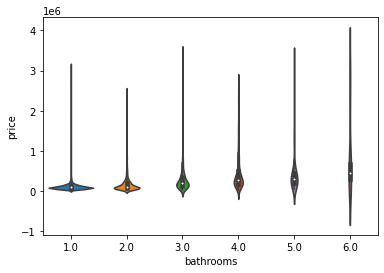

In [31]:
sns.violinplot(x=train1['bathrooms'], y=train1['price'],data=train1 )

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

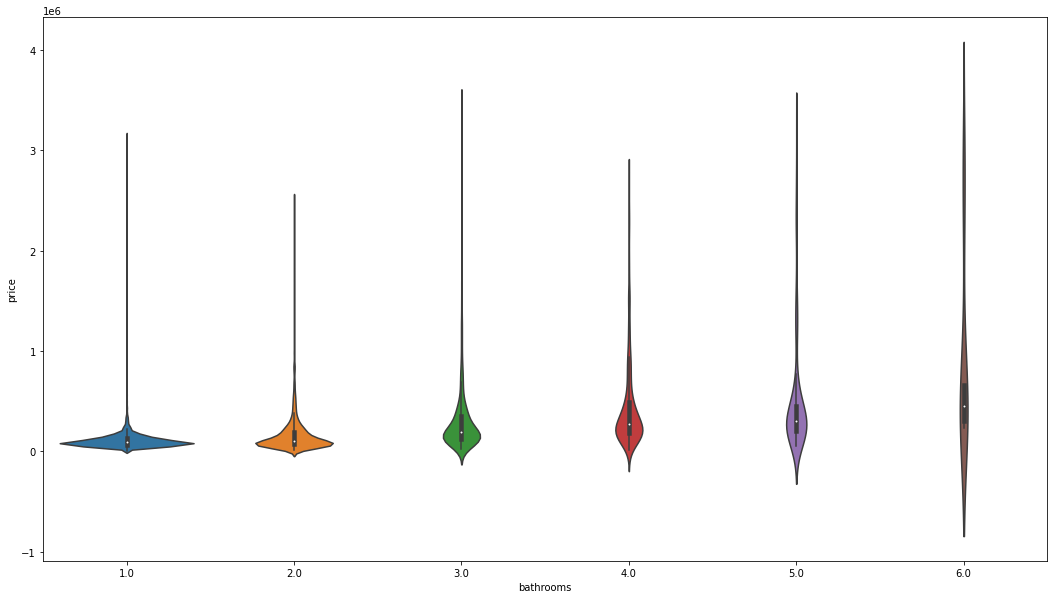

In [36]:
fig, ax = plt.subplots( figsize=(18,10))
sns.violinplot(x=train1['bathrooms'], y=train1['price'],data=train1, ax=ax )

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

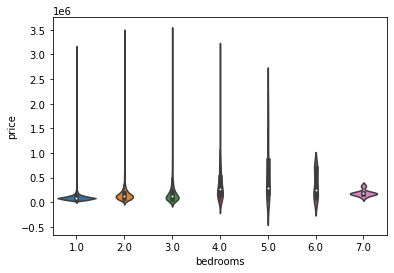

In [37]:
sns.violinplot(x=train1['bedrooms'], y=train1['price'],data=train1 )

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

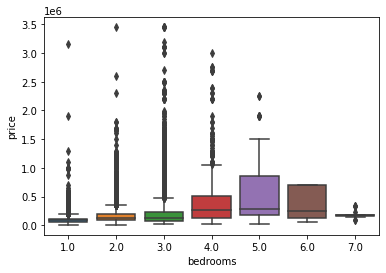

In [38]:
sns.boxplot(x=train1['bedrooms'], y=train1['price'],data=train1 )

<AxesSubplot:xlabel='provincia_departamento', ylabel='price'>

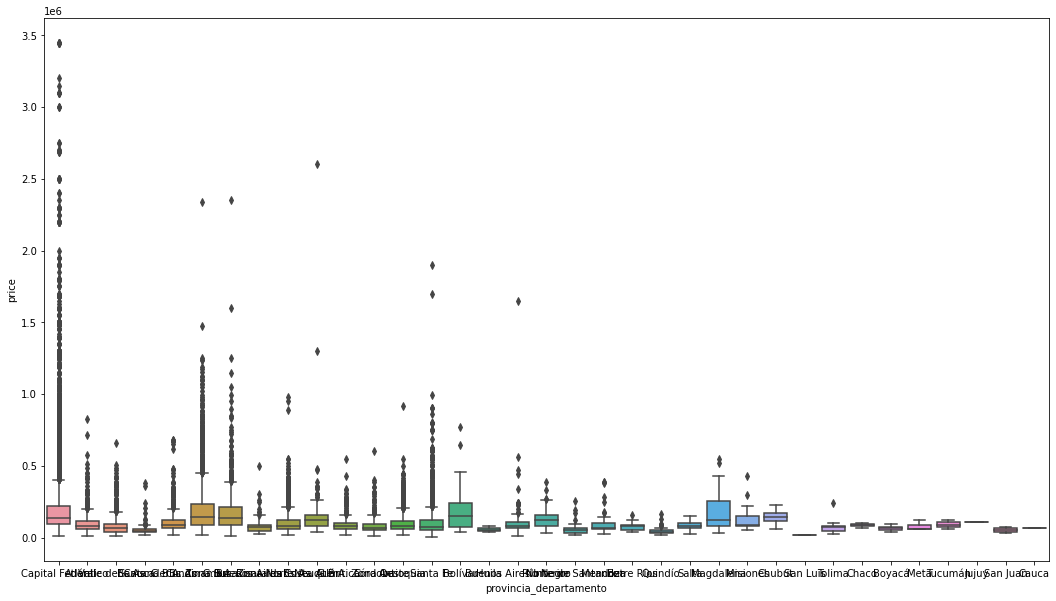

In [40]:
fig, ax = plt.subplots( figsize=(18,10))
sns.boxplot(x=train1['provincia_departamento'], y=train1['price'],data=train1,ax=ax)

In [44]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats
from scipy.stats import pearsonr

In [69]:
ultimaP=ultimo1[['rooms','bathrooms','surface_total','price']]
ultimaP

,rooms,bathrooms,surface_total,price
0,2.0,1.0,37.0,85000.0
2,3.0,3.0,95.0,85329.0
3,3.0,1.0,60.0,22846.0
4,3.0,1.0,45.0,80000.0
5,3.0,2.0,75.0,60556.0
...,...,...,...,...
25655,3.0,2.0,61.0,41288.0
25656,2.0,1.0,40.0,85000.0
25657,2.0,1.0,61.0,185700.0
25658,3.0,1.0,53.0,120000.0


In [72]:
trainTr=ultimaP.drop('price', axis=1)
y=ultimaP['price']
X=trainTr


In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


In [76]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     2170.
Date:                Sat, 09 Oct 2021   Prob (F-statistic):               0.00
Time:                        19:10:36   Log-Likelihood:            -2.3104e+05
No. Observations:               19021   AIC:                         4.621e+05
Df Residuals:                   19017   BIC:                         4.621e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           5.83e+04   1064.399     54.769

In [77]:
comp=train1[['rooms','bathrooms','surface_total','price']]
comp

,rooms,bathrooms,surface_total,price
0,2.0,1.0,37.0,85000.0
1,6.0,4.0,300.0,1590000.0
2,3.0,3.0,95.0,85329.0
3,3.0,1.0,60.0,22846.0
4,3.0,1.0,45.0,80000.0
...,...,...,...,...
25655,3.0,2.0,61.0,41288.0
25656,2.0,1.0,40.0,85000.0
25657,2.0,1.0,61.0,185700.0
25658,3.0,1.0,53.0,120000.0


In [80]:
trainU=comp.drop('price', axis=1)
y=comp['price']
X=trainU


In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


In [82]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     6473.
Date:                Sat, 09 Oct 2021   Prob (F-statistic):               0.00
Time:                        19:19:50   Log-Likelihood:            -2.9291e+05
No. Observations:               21811   AIC:                         5.858e+05
Df Residuals:                   21807   BIC:                         5.859e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.618e+04   3421.293     -7.653

In [83]:
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
const,-32890.077393,-19478.109152
rooms,3708.301928,9076.729153
bathrooms,-66648.292327,-59094.978676
surface_total,3483.474627,3627.484649


In [90]:
from sklearn.metrics import mean_squared_error
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 158438.14052648275
